<h2>Буловятов Артем Максимович М80-210б-20</h2>
<h2>Лабораторная работа No 5: Алгебраические уравнения 4й степени</h2>
<p>
    Задание<br>
Методом Феррари решить заданное уравнение 4й степени.<br>
Нарисовать график функции, отметить на нем найденные корни.<br>
Комплексные корни представить в алгебраической, тригонометрической и
экспоненциальной формах.<br>
</p>
<b>−3x^4 + 7x^3 − 2x^2 + 15x − 5 = 0</b>

In [136]:
x = var("x")

f_x = -3*x**4 + 7*x**3 - 2*x**2 + 15*x -5;
f_copy = f_x
f_x = f_x /f_x.coefficients()[4][0]

In [137]:
y = var("y")
caef = f_x.coefficients()[3][0] # каэфициент при x^3
polynom = f_x(x = y - caef/4).expand().simplify_full() # замена x =y - 7/4
show("Получаем полином после замены x = y - caef/4")
show(polynom)

'Получаем полином после замены x = y - caef/4'

y^4 - 11/8*y^2 - 1255/216*y - 9473/6912

In [149]:

pqr = {'p':polynom.coefficients()[2][0], 'q': polynom.coefficients()[1][0], 'r': polynom.coefficients()[0][0]}
var("s p q r")
resolvent = 2*s**3 - p*s**2 - 2*r*s + r*p - q**2/4
poly_s_n = resolvent(**pqr)

In [139]:
sols = solve(poly_s_n, s)  
s_0 = sols[2].rhs()

In [140]:
var("y s p q")
poly_y_1 = y**2 - y*sqrt(2*s - p) + q/(2*sqrt(2*s - p)) + s
poly_y_2 = y**2 + y*sqrt(2*s - p) - q/(2*sqrt(2*s - p)) + s

poly_y_1_n = poly_y_1(**pqr, s=s_0)
poly_y_2_n = poly_y_2(**pqr, s=s_0)

sols = solve(poly_y_1_n, y)
sols.extend(solve(poly_y_2_n, y))

In [141]:
def trigonometric_representation(z):
    phi = atan2(z.imag(), z.real()).n(digits=4)
    z_abs = z.abs().n(digits=4)
    z_trig = z_abs*(cos(phi, hold=True) + I*sin(phi, hold=True))
    return z_trig
    
def exponential_representation(z):
    phi = atan2(z.imag(), z.real()).n(digits=4)
    z_abs = z.abs().n(digits=4)
    z_exp = f"{z_abs}" + r"\cdot e^{" + f"{phi}" + r"\cdot i}"
    return z_exp

Решения уровнения:    -3*x^4 + 7*x^3 - 2*x^2 + 15*x - 5 = 0

''

x<sub>\(0\)</sub> = \(1.363*cos(-1.827) + 1.363*I*sin(-1.827)\)

x<sub>\(0\)</sub> = \(1.363\cdot e^{-1.827\cdot i}\)

''

x<sub>\(1\)</sub> = \(1.363*cos(1.827) + 1.363*I*sin(1.827)\)

x<sub>\(1\)</sub> = \(1.363\cdot e^{1.827\cdot i}\)

''

x<sub>\(2\)</sub> = \(2.691\)

''

x<sub>\(3\)</sub> = \(0.3333\)

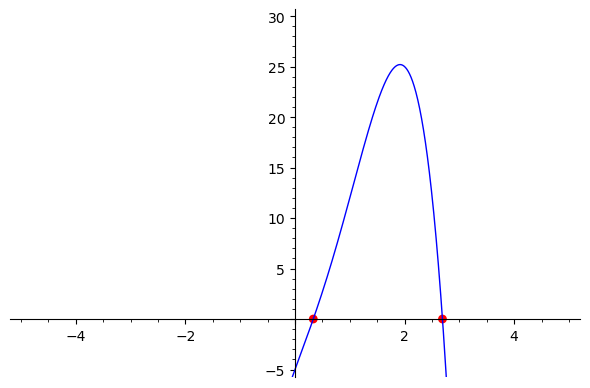

In [148]:
sols = solve(f_x, x)
graf = plot(f_copy, xmin=-5, xmax=5, ymin=-5, ymax=30)
#show(graf)
show(html(f"Решения уровнения:    {f_copy} = 0"))
for i, sol in enumerate(sols):
    a = sol.rhs()
    show("")
    if a.n(digits=4).imag() == 0:
        graf += point((a, 0), size = 40, color = 'red')
        show(html(f"x<sub>${i}$</sub> = ${a.n(digits=4)}$"))
    else:
        phi = atan2(a.imag(), a.real()).n(digits=4)
        z_abs = a.abs().n(digits=4)
        z_trig = z_abs*(cos(phi, hold=True) + I*sin(phi, hold=True))
        show(html(f"x<sub>${i}$</sub> = ${z_trig}$"))
        
        phi = atan2(a.imag(), a.real()).n(digits=4)
        z_abs = a.abs().n(digits=4)
        z_exp = f"{z_abs}" + r"\cdot e^{" + f"{phi}" + r"\cdot i}"
        show(html(f"x<sub>${i}$</sub> = ${z_exp}$"))
show(graf)